# Overview
Interested in the Indian startup ecosystem just like me? Wanted to know what type of startups are getting funded in the last few years? Wanted to know who are the important investors? Wanted to know the hot fields that get a lot of funding these days?
This dataset is a chance to explore the Indian start up scene. Deep dive into funding data and derive insights into the future!

This dataset has funding information of the Indian startups from January 2015 to August 2017. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD)

### Columns include;
<b>Sr No</b> - Serial Number<br>
<b>Date dd/mm/yyyy</b> - Date of funding in dd/mm/yyy format<br>
<b>Startup Name</b> - Name of the startup<br>
<b>Industry Vertical</b> - Industry vertical of the startup<br>
<b>SubVertical</b> - Industry sub-vertical<br>
<b>City Location</b> - city of location<br>
<b>Investors Name</b> - Name of the investors<br>
<b>InvestmentnType</b> - Type of investment<br>
<b>Amount</b> - Amount in USD<br>
<b>Remarks</b> - Other remarks if any<br>

# Questions 
1. How does the funding ecosystem change with time?
2. Do cities play a major role in funding?
3. Which industries are favored by investors for funding?
4. Who are the important investors in the Indian Ecosystem?
5. How much funds does startups generally get in India?

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt

import re
from decimal import Decimal

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
data = pd.read_csv("startup_funding.csv")

In [3]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [9]:
for x in data["SubVertical"]:
    re.finditer("E-:.*", x)

TypeError: expected string or bytes-like object

In [4]:
data.shape

(3044, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


# Univariate Analysis

In [6]:
dfSummary(data, is_collapsible = False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Sr No[int64],Mean (sd) : 1522.5 (878.9)min < med < max:1.0 < 1522.5 < 3044.0IQR (CV) : 1521.5 (1.7),"3,044 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACOUlEQVR4nO3XO4/aQBSG4TOwQcMltrgEOpqU6SzR0KRLmR+bNj1IqSnSpKJBSMgY4SyKRZxiE2mb7GKP9vKJ92nx8RxbryzhyrI04LVrvPQCwCVuHrvAOdc2s1bN+/8qy/K25myQwL3NXmh31b3NnraVB0N1zrWHw+HnKIr6dU7e7/dH59xXMzvVmbe7L/7vGnN+MBh8iuO4W/Pc0N2vbW+zwN0Ph0PqnPvyv1gf+6K2oijqz+fz2ziOKz34ZrN5u1wuP06n01Gz2az80s7n85s8z9/3er0fjUajqDJbFIU3sw+z2ezbaDQ6VD07ZPdr3NssbPcsy/xisejvdruWmdUK1czM4jg+jcfjn1UOT9O07b3vJElymkwmaZVZM7P1et1frVbvkiT5XnX+72zHe19U3dssbPdr3PvefO3dzaz90I8XhRqi2+1Wjtzs7qXXnf83Gyrk7Gva+/78U+FfPyQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiTcXHJRlmW+6o2Px6M3M8vz3G+3285zzquerbp36Pwlff0Bf1Iz3wEKp88AAAAASUVORK5CYII="">",0(0.0%)
2,Date dd/mm/yyyy[object],1. 2/2/20152. 8/7/20153. 30/11/20164. 4/10/20165. 23/07/20156. 1/6/20157. 8/2/20168. 21/06/20169. 22/01/201610. 4/5/201611. other,"11 (0.4%)11 (0.4%)11 (0.4%)10 (0.3%)9 (0.3%)9 (0.3%)9 (0.3%)9 (0.3%)9 (0.3%)9 (0.3%)2,947 (96.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADo0lEQVR4nO3cQWojVxhG0b+McNqTEkLgJSR78CJ6sb0ILSJ7MMY1iDueKIMEYtKdSaBvgXLOyGj0Bhc9SdTn5Xq9DhTu9j4A/x9iIyM2MmIjIzYyYiMjNjJiIyM2MsvMPMzMXK/Xt53Pwo07nM/nzzMzy7J8ERw/0t26rqd1XU8zc7/3YbhtPrORERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nDtm0vf/39vutJuHk2CGQW/zKLinc2MtZVZKyryPjpg4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGY+FkzF4IeOdjYzBCxmDFzJ++iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsZj4WQMXsj4zEbGNUrGuoqMdRUZn9nIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5HxWDgZ6yoyPrORuVuW5ZdlWT7tfRBu393M/DwzP+19EG6fa5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjczdzPw6M7/vfRBunw0CGdcoGbGRMXghY/BCxjVKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxjZIRGxnrKjLWVWRco2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHGNkhEbGYMXMgYvZFyjZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcY2SERsZsZGxriJjXUXGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnXKBmxkTF4IWPwQsY1SkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGdcomWVmHmbmfu+DcHPer9fr28cXDufz+fO6rqe9TsRt2rbtZVmWLx+DO6zrenp6eno7Ho9f9zwct+P19fXT5XI5PT8/38/M37HNzByPx6+Pj4+/7XY6btHDP1/wBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MYebPR0L2Pgi34996Omzb9nK5XE7znUdC4L/atu1lZt4/vuaxcH6Ubx4Lt64i4wsCGbGRERsZsZERGxmxkREbGbGRERuZPwC/n67sAVvbuQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Startup Name[object],1. Ola Cabs2. Swiggy3. Paytm4. Meesho5. Nykaa6. NoBroker7. Medinfi8. UrbanClap9. Flipkart10. Grofers11. other,"8 (0.3%)8 (0.3%)7 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)5 (0.2%)5 (0.2%)2,981 (97.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYi

### Deep Dive on Date Column 

In [7]:
data.rename(columns={"Date dd/mm/yyyy": "Date"}, inplace=True)

In [8]:
with pd.option_context('display.max_rows', None,):
    print(data["Date"])

0          9/1/2020
1        13/01/2020
2          9/1/2020
3          2/1/2020
4          2/1/2020
5        13/01/2020
6         10/1/2020
7        12/12/2019
8         6/12/2019
9         3/12/2019
10       13/12/2019
11       17/12/2019
12       16/12/2019
13       16/12/2019
14       14/12/2019
15       11/12/2019
16       20/12/2019
17       13/11/2019
18       14/11/2019
19       13/11/2019
20       17/11/2019
21       18/11/2019
22       15/11/2019
23       20/11/2019
24       12/11/2019
25       20/11/2019
26       11/11/2019
27       19/11/2019
28       18/11/2019
29       15/11/2019
30       19/11/2019
31       25/11/2019
32        4/10/2019
33        2/10/2019
34       21/10/2019
35         5/9/2019
36         4/9/2019
37         4/9/2019
38         4/9/2019
39         4/9/2019
40         4/9/2019
41         4/9/2019
42         4/9/2019
43         3/9/2019
44         1/8/2019
45         1/8/2019
46         1/8/2019
47         1/8/2019
48         1/8/2019
49        12/8/2019


In [9]:
# Check for data type
data["Date"].dtypes

dtype('O')

In [10]:
data["Date"].replace(["05/072018","01/07/015","22/01//2015","12/05.2015", "13/04.2015","15/01.2015"], 
                     ["05/07/2018", "01/07/2015", "22/01/2015","12/05/2015","13/04/2015", "15/01/2015"], 
                     inplace = True, regex = True)

In [11]:
# convert from object to datetime
data["Date"] = pd.to_datetime(data["Date"],format = "%d/%m/%Y")

In [12]:
# Check for data type
data["Date"].dtypes

dtype('<M8[ns]')

In [13]:
# Feature engineer Date time
data['Year'] = data['Date'].dt.year

#Drop the Date, Sr No column and Remarks
data.drop(["Date","Sr No", "Remarks"], axis = 1, inplace = True)

In [14]:
data.head()

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year
0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",2020
1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",2020
2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",2020
3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",2020
4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",2020


### Deep Dive on Startup Name

In [15]:
with pd.option_context('display.max_rows', None,):
    print(data["Startup Name"])

0                                                  BYJU’S
1                                                  Shuttl
2                                               Mamaearth
3                            https://www.wealthbucket.in/
4                                                  Fashor
5                                                   Pando
6                                                  Zomato
7                                                  Ecozen
8                                                CarDekho
9                                            Dhruva Space
10                                                 Rivigo
11                                             Healthians
12                                                Licious
13                                                 InCred
14                                                  Trell
15                                             Rein Games
16                                           Lenskart.com
17            

In [16]:
data["Startup Name"].unique()

array(['BYJU’S', 'Shuttl', 'Mamaearth', ..., 'Graphene', 'Simplotel',
       'couponmachine.in'], dtype=object)

In [17]:
data["Startup Name"].value_counts(pd.set_option("display.max_rows", None))

Ola Cabs                                                  8
Swiggy                                                    8
Paytm                                                     7
Meesho                                                    6
Nykaa                                                     6
NoBroker                                                  6
Medinfi                                                   6
UrbanClap                                                 6
Flipkart                                                  5
Grofers                                                   5
Uniphore                                                  5
Capital Float                                             5
Moglix                                                    5
Toppr                                                     5
Jugnoo                                                    5
Icertis                                                   4
Wooplr                                  

In [18]:
# Solve the discrepancies
data.loc[data["Startup Name"] == "https://www.wealthbucket.in/", ["Startup Name"]] = ["Wealth Bucket"]
data.loc[data["Startup Name"] == "BYJU\\'S", ["Startup Name"]] = ["BYJU"]
data.loc[data["Startup Name"] == "What\\xe2\\x80\\x99s Up Life", ["Startup Name"]] = ["Up Life"]
data.loc[data["Startup Name"] == "Byju\\xe2\\x80\\x99s", ["Startup Name"]] = ["BYJU"]
data.loc[data["Startup Name"] == "Creator\\xe2\\x80\\x99s Gurukul", ["Startup Name"]] = ["Gurukul"]
data.loc[data["Startup Name"] == "SERV\\xe2\\x80\\x99D", ["Startup Name"]] = ["Serv"]
data.loc[data["Startup Name"] == "BYJU\\xe2\\x80\\x99s", ["Startup Name"]] = ["BYJU"]
data.loc[data["Startup Name"] == "\\xc2\\xa0Nudgespot", ["Startup Name"]] = ["Nudgespot"]


### Deep dive on  Amount 

In [19]:
data.rename(columns={"Amount in USD": "Amount"}, inplace=True)
data["Amount"].dtypes

dtype('O')

In [20]:
with pd.option_context('display.max_rows', None,):
    print(data["Amount"])

0               20,00,00,000
1                  80,48,394
2                1,83,58,860
3                  30,00,000
4                  18,00,000
5                  90,00,000
6               15,00,00,000
7                  60,00,000
8                7,00,00,000
9                5,00,00,000
10               2,00,00,000
11               1,20,00,000
12               3,00,00,000
13                 59,00,000
14                 20,00,000
15               5,00,00,000
16              23,10,00,000
17              15,00,00,000
18                  4,86,000
19                 15,00,000
20               undisclosed
21               1,20,00,000
22               2,60,00,000
23               1,74,11,265
24                 13,00,000
25              13,50,00,000
26                  3,00,000
27              22,00,00,000
28               1,58,00,000
29              28,30,00,000
30              20,00,00,000
31            1,00,00,00,000
32               4,50,00,000
33              58,50,00,000
34            

In [21]:
for i in range (0, len(data["Amount"])):
    data["Amount"][i]= re.sub('\D',"",str(data["Amount"][i]))
data["Amount"] = pd.to_numeric(data["Amount"])

In [22]:
data["Amount"].dtypes

dtype('float64')

### Deep Dive on City

In [23]:
data.rename(columns={"City  Location": "City"}, inplace=True)

In [24]:
data["City"].value_counts()

Bangalore                 700
Mumbai                    567
New Delhi                 421
Gurgaon                   287
Bengaluru                 141
Pune                      105
Hyderabad                  99
Chennai                    97
Noida                      92
Gurugram                   50
Ahmedabad                  38
Delhi                      34
Jaipur                     30
Kolkata                    21
Indore                     13
Chandigarh                 11
Goa                        10
Vadodara                   10
Singapore                   8
Coimbatore                  5
Pune / US                   4
Kanpur                      4
\\xc2\\xa0Gurgaon           4
\\xc2\\xa0New Delhi         3
Bhopal                      3
Faridabad                   3
Nagpur                      3
Kormangala                  2
Udupi                       2
Udaipur                     2
San Francisco               2
New Delhi / US              2
Trivandrum                  2
Bangalore 

In [25]:
#data["City"].replace("\\xc2\\xa0New Delhi", "New Delhi", inplace = True)

In [26]:
data.loc[data["City"] == "Bangalore", ["City"]] = ["Bengaluru"]
data.loc[data["City"] == "Gurgaon", ["City"]] = ["Gurugram"]
data.loc[data["City"] == "\\xc2\\xa0Gurgaon", ["City"]] = ["Gurgaon"]
data.loc[data["City"] == "\\xc2\\xa0New Delhi", ["City"]] = ["New Delhi"]
data.loc[data["City"] == "New Delhi / US", ["City"]] = ["New Delhi"]
data.loc[data["City"] == "Bangalore / SFO", ["City"]] = ["Bangalore"]
data.loc[data["City"] == "Pune / US", ["City"]] = ["Pune"]
data.loc[data["City"] == "\xc2\\xa0Mumbai", ["City"]] = ["Mumbai"]
data.loc[data["City"] == "Pune/Seattle", ["City"]] = ["Pune"]
data.loc[data["City"] == "Seattle / Bangalore", ["City"]] = ["Bangalore"]
data.loc[data["City"] == "SFO / Bangalore", ["City"]] = ["Bangalore"]
data.loc[data["City"] == "Mumbai / UK", ["City"]] = ["Mumbai"]
data.loc[data["City"] == "New Delhi / California", ["City"]] = ["New Delhi"]
data.loc[data["City"] == "New York, Bengaluru", ["City"]] = ["Bengaluru"]
data.loc[data["City"] == "Bangalore / San Mateo", ["City"]] = ["Bangalore"]
data.loc[data["City"] == "New Delhi/ Houston", ["City"]] = ["New Delhi"]
data.loc[data["City"] == "Mumbai / NY", ["City"]] = ["Mumbai"]
data.loc[data["City"] == "Pune / Singapore", ["City"]] = ["Pune"]
data.loc[data["City"] == "Chennai/ Singapore", ["City"]] = ["Chennai"]
data.loc[data["City"] == "Mumbai / Global", ["City"]] = ["Mumbai"]
data.loc[data["City"] == "Hyderabad/USA", ["City"]] = ["Hyderabad"]
data.loc[data["City"] == "Noida / Singapore", ["City"]] = ["Noida"]
data.loc[data["City"] == "Mumbai / NY", ["City"]] = ["Mumbai"]
data.loc[data["City"] == "\\xc2\\xa0Bangalore", ["City"]] = ["Bangalore"]
data.loc[data["City"] == "Dallas / Hyderabad", ["City"]] = ["Hyderabad"]
data.loc[data["City"] == "New Delhi", ["City"]] = ["Delhi"]

### Deep Dive on Investors Name

In [27]:
data["Investors Name"].value_counts()

Undisclosed Investors                                                                                                                                                                39
Undisclosed investors                                                                                                                                                                30
Ratan Tata                                                                                                                                                                           25
Indian Angel Network                                                                                                                                                                 23
Kalaari Capital                                                                                                                                                                      16
Group of Angel Investors                                                        

In [28]:
words =["Undisclosed Investors", "Undisclosed investors", "Undisclosed Investor", \
         "undisclosed investors", "Undisclosed","Undisclosed investor", "3 undisclosed investors"]

for name in data["Investors Name"]:
    if name in words:
        data["Investors Name"].replace(name, "Undisclosed", inplace = True)
    else:
        pass

# Bivariate Analysis

### 1. How does the funding ecosystem change with time?

In [30]:
funding_years

NameError: name 'funding_years' is not defined

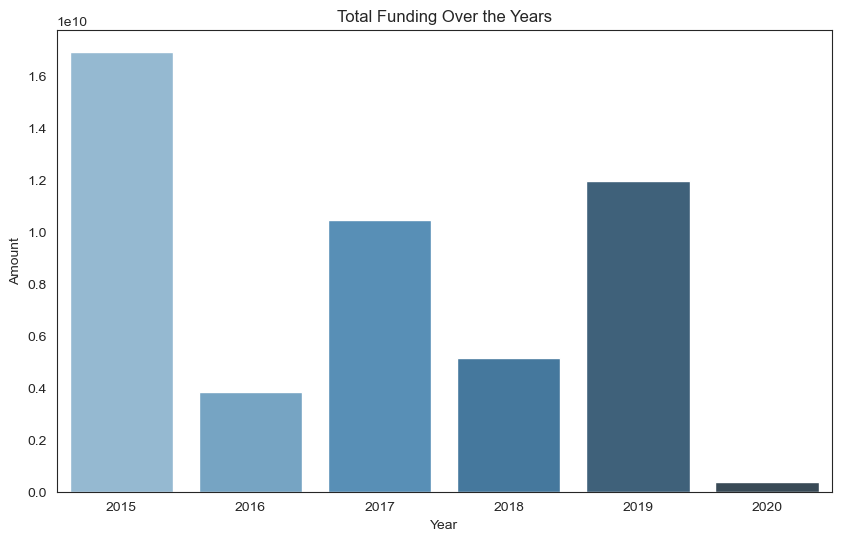

In [48]:
funding_years = data.groupby("Year")["Amount"].sum().reset_index()

for i in funding_years.Amount:
    if isinstance(i, float):
        funding_years["Amount"] == Decimal(i)
        


plt.figure(figsize=(10,6))
plt.title("Total Funding Over the Years")
sns.set_style(style="white")
sns.barplot(x="Year", y="Amount", palette="Blues_d", data=funding_years)


plt.show()

In [59]:
import math

In [63]:
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

plt.figure(figsize=(10,6))
sns.factorplot(x ='Year',y='Amount', data=funding_years, kind='bar', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = funding_years['Amount'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', transform=ax.transAxes)

<Figure size 1000x600 with 0 Axes>

ValueError: Image size of 1729x2115119672 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 400x400 with 1 Axes>

Funding over the years has been independent and not correlated. The years from 2015 to 2020 all saw different amounts of funding. From the graph above, we saw that <b>2015</b> had the highest amount of funding of <b>16,913,022,448 USD</b> from the investors.<br><br> 
The year <b>2016</b> had funding to the tune of <b>3,828,088,608 USD</b> whilst <b>2017</b> had the third lagest funding from Investors with an amount of <b>10,429,309,730 USD</b>.<br><br>
In <b>2018</b>, the amount reduced from the previous year to <b>5,122,368,369 USD</b> representing 50.88% in decline.<br><br>
2019 saw a rise of 133% in funding from the previous year. A whooping <b>11,952,031,047 USD</b> was invested in the year.<br><br>
The year <b>2020</b> had the lowest amount of funds invested with an amount of <b>390,207,254 USD</b>. What could cause this huge decline? could it be the cause of aftermath of covid19 where lots of businesses were folding up? This claim needs to be investigated further.<br>

## 2. Do cities play a major role in funding?

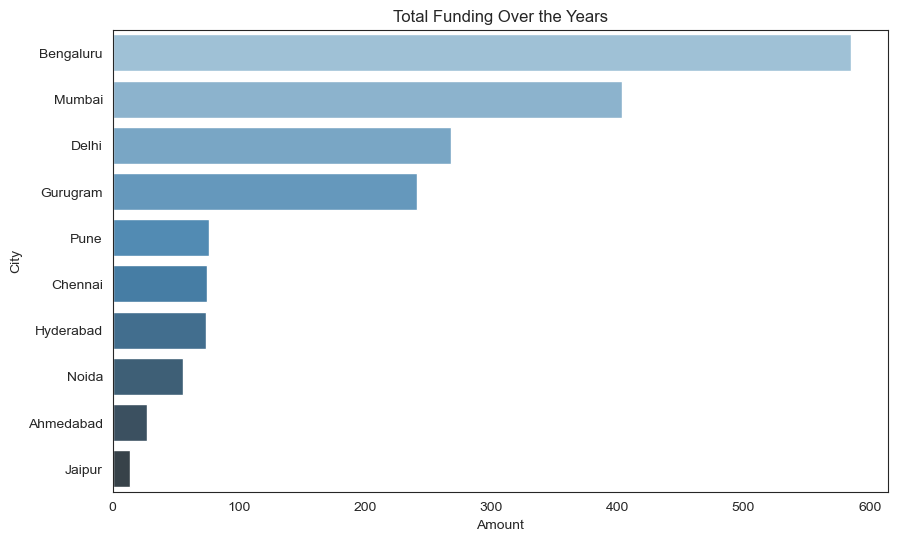

In [32]:
cities_funding = data.groupby("City")["Amount"].count().reset_index()
cities_funding = cities_funding.sort_values(by="Amount", ascending = False)

plt.figure(figsize=(10,6))
plt.title("Total Funding Over the Years")
sns.set_style(style="white")
sns.barplot(x="Amount", y="City", palette="Blues_d", data=cities_funding.iloc[:10])
plt.show()

The graph above shows ranked cities with respect to their number of funding they received over the course of the six year period. Cities do play a major role because a chunk of funding opportunities were provided to the best cities in India in terms of poppulation, economic variability and infrastructure among others.<br><br>
Narrowing our analysis down to the top three cities, the city of Bengaluru has the second-fastest-growing economies in India with an average economic growth of 10.3%. There are more IT firms in Bangalore than in any other Indian City. Between 2006 and 2007, these companies constituted 33% of the country’s IT exports. It is also a biotechnology hub of the country.<br><br>
Delhi has the second-highest population after Mumbai, with about 16.3 million inhabitants. Delhi’s wealth as a city ranks second in the country after Mumbai. In 2016, it was among the two most productive metro areas in India.<br><br>
Mumbai metropolitan area with a total area of 1681.5 square miles. The city has a population of about 18.4 million inhabitants, and it is the most populated city in India. Its wealth also surpasses that of any other Indian city as it is home to the highest number of Indian millionaires and billionaires.<br><br>

### 3. Which industries are favored by investors for funding?

In [33]:
data["Industry Vertical"].value_counts()

Consumer Internet                                             941
Technology                                                    478
eCommerce                                                     186
Healthcare                                                     70
Finance                                                        62
ECommerce                                                      61
Logistics                                                      32
E-Commerce                                                     29
Education                                                      24
Food & Beverage                                                23
Ed-Tech                                                        14
E-commerce                                                     12
FinTech                                                         9
IT                                                              8
Ecommerce                                                       8
Fin-Tech  

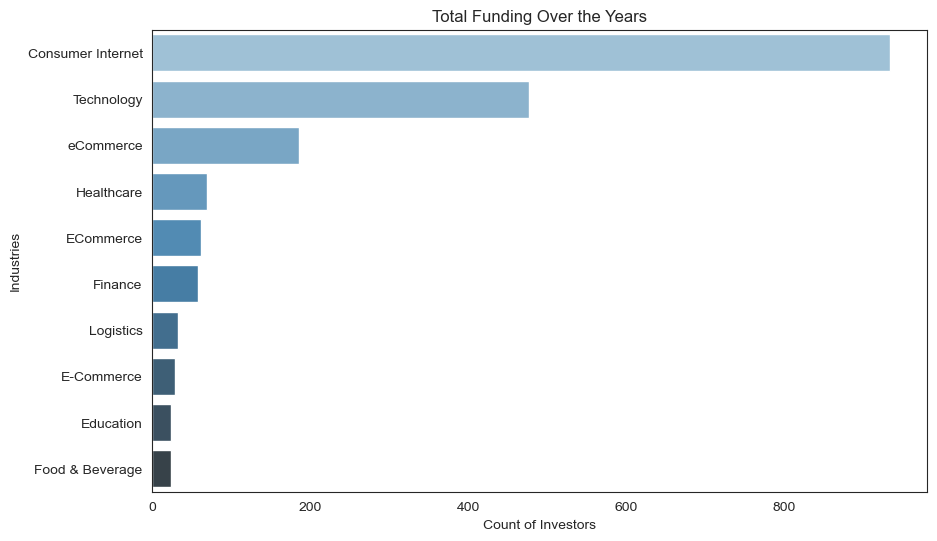

In [34]:
Investors_industries = data.groupby("Industry Vertical")["Investors Name"].count().reset_index()
Investors_industries= Investors_industries.sort_values(by="Investors Name", ascending = False)

plt.figure(figsize=(10,6))
plt.title("Total Funding Over the Years")
sns.set_style(style="white")
sns.barplot(x= "Investors Name", y="Industry Vertical", palette="Blues_d", data=Investors_industries.iloc[:10])
plt.xlabel("Count of Investors")
plt.ylabel("Industries")
plt.show()

Startups in the Consumer Internet had the highest number of funding with 934.Followed by Technolgy, E-Commerce, Healthcare with numbers 476, 186, and 69 respectively.

### 4. Who are the important investors in the Indian Ecosystem?

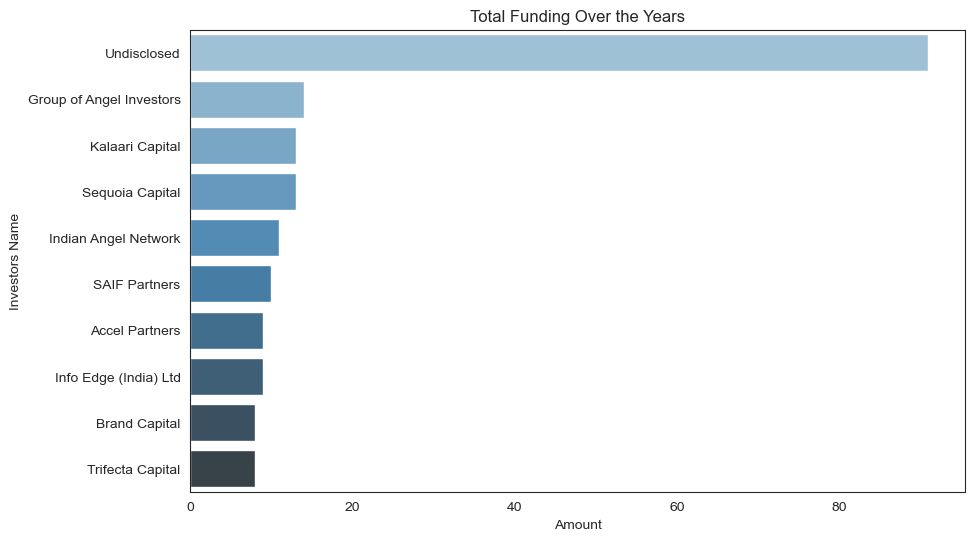

In [35]:
Key_Investors = data.groupby("Investors Name")["Amount"].count().reset_index()
Key_Investors = Key_Investors.sort_values(by="Amount", ascending = False)

plt.figure(figsize=(10,6))
plt.title("Total Funding Over the Years")
sns.set_style(style="white")
sns.barplot(x="Amount", y="Investors Name", palette="Blues_d", data = Key_Investors.iloc[:10])
plt.show()

Majority (91) of Investors remaned undisclosed. Group of Angel Investors has invested in 14 startups followed by Kalaari Capital and Sequoia Capital with both 13 investments.

### 5. How much funds does startups generally get in India?

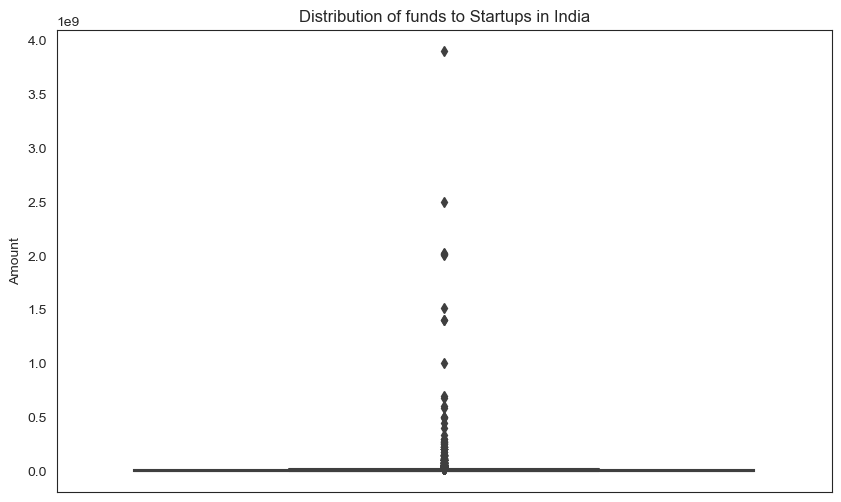

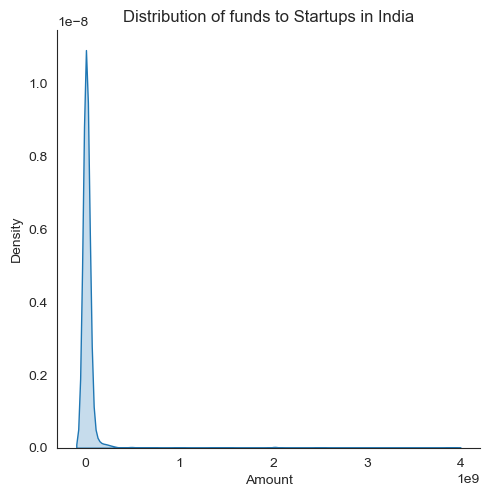

In [36]:
plt.figure(figsize=(10,6))
sns.set_style(style="white")
sns.boxplot(data=data, y='Amount')
plt.title('Distribution of funds to Startups in India')
plt.show()

sns.displot(data, x="Amount", kind="kde", fill=True)
plt.title('Distribution of funds to Startups in India')
plt.show()

This amount of funds startup generally gets can be derived from the distribution of the funding amount. From our graph, majority of funds given to startups are below a billion USD. 